In [1]:
import requests
import os
import pandas as pd
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt

In [2]:
# Make directory if it doesn't already exist
folder_name = 'weratedogs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
# Gather the image-predictions file
with open(os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
        file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv', '.ipynb_checkpoints']

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv',delimiter='\t') # read image predictions file

In [6]:
''' Gather the Tweetdata from Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

'''

" Gather the Tweetdata from Twitter API\nconsumer_key = ''\nconsumer_secret = ''\naccess_token = ''\naccess_secret = ''\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)\n\n"

In [7]:
'''
tweet_id_list = df['tweet_id'].tolist() #create list for tweet_id from the twitter_archive

working =[] # list for active tweet_ids
not_working = [] # list for non-active tweet_ids

# Function gets info from Twitter API, if tweet_id exists, write data in to file and add tweet-id to working list for reference. 
# For non-existing tweet-id add id to not-working list
# use time module to return elapsed time


with open('tweet_json.txt', 'w') as file:
    t = time.process_time()
    for tweet_id in tweet_id_list:
        try:
            tweet_info = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_info._json, file)
            file.write('\n')
            working.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            not_working.append(tweet_id)
    elapsed_time = time.process_time()-t
    print(elapsed_time)
    


print(len(not_working)) # 14 tweet_ids are no longer valid
print(len(working)) #there are 2342 tweet_ids still active

'''

"\ntweet_id_list = df['tweet_id'].tolist() #create list for tweet_id from the twitter_archive\n\nworking =[] # list for active tweet_ids\nnot_working = [] # list for non-active tweet_ids\n\n# Function gets info from Twitter API, if tweet_id exists, write data in to file and add tweet-id to working list for reference. \n# For non-existing tweet-id add id to not-working list\n# use time module to return elapsed time\n\n\nwith open('tweet_json.txt', 'w') as file:\n    t = time.process_time()\n    for tweet_id in tweet_id_list:\n        try:\n            tweet_info = api.get_status(tweet_id,tweet_mode='extended')\n            json.dump(tweet_info._json, file)\n            file.write('\n')\n            working.append(tweet_id)\n        except Exception as e:\n            print(tweet_id,e)\n            not_working.append(tweet_id)\n    elapsed_time = time.process_time()-t\n    print(elapsed_time)\n    \n\n\nprint(len(not_working)) # 14 tweet_ids are no longer valid\nprint(len(working)) #ther

In [8]:
#Reading JSON content as pandas dataframe
tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [9]:
#get twitter_archive data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [10]:
# set copy for assessing and cleaning steps
tweet_copy = tweet_data.copy()
image_copy = image_predictions.copy()
twitter_copy = twitter_archive.copy() 

In [11]:
twitter_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# use info to see the datatypes in the table, several columns do not have appropriate data type
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# look closer to dog names
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Toby            7
an              7
Bailey          7
Daisy           7
Buddy           7
Stanley         6
Scout           6
Oscar           6
Dave            6
Leo             6
Milo            6
Jax             6
Bella           6
Rusty           6
Jack            6
Koda            6
Bentley         5
             ... 
Jim             1
Mookie          1
Flash           1
Pumpkin         1
Marty           1
Sky             1
Puff            1
Pancake         1
Gilbert         1
Mitch           1
Roscoe          1
Mason           1
Iroh            1
Champ           1
Monster         1
Danny           1
Gin             1
Rambo           1
Edmund          1
Ed              1
Poppy           1
Skye            1
Longfellow      1
Willem          1
Creg      

In [14]:
twitter_copy[twitter_copy['text'].str.contains('\n')].text # text is sometimes not easy to read

6       Meet Jax. He enjoys ice cream so much he gets ...
27      This is Mingus. He's a wonderful father to his...
56      Here is a pupper approaching maximum borkdrive...
73      RT @dog_rates: Meet Shadow. In an attempt to r...
75      Meet Shadow. In an attempt to reach maximum zo...
97      RT @dog_rates: This is Sierra. She's one preci...
98      This is Sierra. She's one precious pupper. Abs...
100     Here are my favorite #dogsatpollingstations \n...
114     This is Cody. He zoomed too aggressively and t...
124     RT @dog_rates: Say hello to Cooper. His expres...
126     Say hello to Cooper. His expression is the sam...
146     RT @dog_rates: Say hello to Quinn. She's quite...
150     Say hello to Quinn. She's quite the goofball. ...
159     RT @dog_rates: Meet Lorenzo. He's an avid nift...
161     Meet Lorenzo. He's an avid nifty hat wearer an...
177     Instead of the usual nightly dog rate, I'm sha...
204     RT @dog_rates: I usually only share these on F...
205     Meet B

In [15]:
twitter_copy.source[123] # source is in html code, we can extract the info we need 

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [16]:
image_copy[image_copy['tweet_id'].duplicated()]# Checking for duplicates of tweet_id

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
image_copy[image_copy['jpg_url'].duplicated()] # Checking for duplicates of jpg_url

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [18]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assessing Data

### Quality

   **In twitter_archive**

    - Erroneous datatypes for these columns:
          in_reply_to_status_id,in_reply_to_user_id,doggo,floofer,pupper,puppo,timestamp,tweet_id
    - We only want original ratings (no retweets) that have images.
      So the columns regarding retweeted_status are redundant in the table.
    - The dog types should have NaN instead of None
    - Dog names in column 'name' are sometimes incorrect (there are names like "a", "an" etc.)
    - Source column is hard to read.
    - rating_numerators and denominators are not always correct in comparison to the rating in the column text. 

   **In image_predictions**

    - Not all ratings have an image only 2075 from 2356
    - Same url for different tweet_ids

### Tidiness

    - Join tweet_data and image_preditions tables to twitter_archive
    - 9 columns for predictions and confidence level in 2 categorical variables
    - dog stage are in four columns: doggo,floofer,pupper,puppo


## Cleaning Data

### Define

Remove the retweet columns

### Code

In [19]:
twitter_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

### Test

In [20]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


### Define

Consolidate the dog stage columns to one column

### Code

In [21]:
# The dog stage columns are extracted from the text column
# For example if the word puppo is in the tweet, the puppo is listed in the puppo column
twitter_copy[twitter_copy['text'].str.contains('puppo')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [22]:
# So we can use the str.extract with the text column
twitter_copy['dog_stage'] = twitter_copy['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
twitter_copy.drop(['puppo','pupper','floofer','doggo'],axis=1, inplace=True)


### Test

In [23]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
dog_stage                399 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 202.5+ KB


### Define 

Convert  erroneous datatypes:
    1. timestamp to datetime
    2. tweet_id from int to str
    3. in_reply_to_status_id,in_reply_to_user_id in str
    
### Code

In [24]:
# 1. convert timestamp to datetime data type
twitter_copy.timestamp=pd.to_datetime(twitter_copy.timestamp)

In [25]:
# 2. convert tweet_id to string data type
twitter_copy.tweet_id=twitter_copy.tweet_id.astype(str)

In [26]:
# 3. convert in_reply_to_status_id,in_reply_to_user_id to string data type
twitter_copy.in_reply_to_status_id=twitter_copy.in_reply_to_status_id.astype(str)
twitter_copy.in_reply_to_user_id=twitter_copy.in_reply_to_user_id.astype(str)

### Test

In [27]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
dog_stage                399 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


### Define

Join image and tweet data tables to twitter_archive table

### Code

In [28]:
image_copy.tweet_id=image_copy.tweet_id.astype(str) # save tweet_id as string since we dont need them to be numerical
twitter_copy=pd.merge(twitter_copy,image_copy,on='tweet_id',how='left') # left join twitter archive with image-predictions tables
tweet_copy.id=tweet_copy.id.astype(str)# save tweet_id as string since we dont need them to be numerical
twitter_copy=pd.merge(twitter_copy,tweet_copy,left_on='tweet_id',right_on='id',how='left')#left join twitter archive with tweet-datas tables


### Test

In [29]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 54 columns):
tweet_id                         2356 non-null object
in_reply_to_status_id_x          2356 non-null object
in_reply_to_user_id_x            2356 non-null object
timestamp                        2356 non-null datetime64[ns]
source_x                         2356 non-null object
text                             2356 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
dog_stage                        399 non-null object
jpg_url                          2075 non-null object
img_num                          2075 non-null float64
p1                               2075 non-null object
p1_conf                          2075 non-null float64
p1_dog                           2075 non-null object
p2                    

In [30]:
twitter_copy.to_csv('twitter_copy.csv', encoding = 'utf-8',index = False)
df = pd.read_csv('twitter_copy.csv') # save the new dataframe as csv file

### Define

Drop duplicates and irrelevant informations

### Code

In [31]:
df = df.drop_duplicates() # drop duplicates

In [32]:
# Delete tweets without pictures
df = df.dropna(subset = ['jpg_url'])

In [33]:
#drop columns with irrelevant informations
cols=['geo', 'place','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink','contributors','coordinates','id','id_str','created_at','retweeted','retweeted_status','in_reply_to_status_id_x','in_reply_to_user_id_x','in_reply_to_screen_name','in_reply_to_status_id_y','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str']
df.drop(cols, axis=1, inplace=True)

### Test

In [34]:
df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,favorited,full_text,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,source_y,truncated,user
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,This is Phineas. He's a mystical boy. Only eve...,False,en,0.0,0.0,8376.0,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,False,This is Tilly. She's just checking pup on you....,False,en,0.0,0.0,6184.0,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,False,This is Archie. He is a rare Norwegian Pouncin...,False,en,0.0,0.0,4092.0,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,This is Darla. She commenced a snooze mid meal...,False,en,0.0,0.0,8518.0,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,False,This is Franklin. He would like you to stop ca...,False,en,0.0,0.0,9223.0,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define 

Change predictions columns to categorical variables

### Code

In [35]:
#set up lists for values of predictions and confidence-levels
p_rank = []
conf_level = []

# function to get the values, add the value to the lists above
def get_value(dataframe):
    if dataframe['p1_dog'] == True:
        p_rank.append(dataframe['p1'])
        conf_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        p_rank.append(dataframe['p2'])
        conf_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        p_rank.append(dataframe['p3'])
        conf_level.append(dataframe['p3_conf'])
    else:
        p_rank.append('NaN')
        conf_level.append(0)

In [36]:
df.apply(get_value, axis=1) # set up the columns for the two variables
df['p_rank'] = p_rank
df['conf_level'] = conf_level

In [37]:
# Since we create the new two variables, we can drop the 9 columns and the image number column
df.drop(['p1','p1_conf','p2','p2_conf','p3','p3_conf','p1_dog','p2_dog','p3_dog','img_num'], axis=1, inplace=True)

### Test

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                         2075 non-null int64
timestamp                        2075 non-null object
source_x                         2075 non-null object
text                             2075 non-null object
expanded_urls                    2075 non-null object
rating_numerator                 2075 non-null int64
rating_denominator               2075 non-null int64
name                             2075 non-null object
dog_stage                        338 non-null object
jpg_url                          2075 non-null object
display_text_range               2068 non-null object
entities                         2068 non-null object
extended_entities                2068 non-null object
favorite_count                   2068 non-null float64
favorited                        2068 non-null object
full_text                        2068 non-null object
is_quote_status                 

### Define 

Extract source from source column

### Code

In [39]:
# Since we have 2 columns for "source", I compare the two columns: 
df.query('source_x != source_y') # the column source_y is incomplete, it can be dropped

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,source_y,truncated,user,p_rank,conf_level
19,888202515573088257,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembroke,0.809197
95,873697596434513921,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French_bulldog,0.099984
155,861769973181624320,2017-05-09 02:29:07,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",https://twitter.com/dog_rates/status/806629075...,13,10,None,NaN,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cocker_spaniel,0.046403
260,842892208864923648,2017-03-18 00:15:37,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,0.505370
298,837012587749474308,2017-03-01 18:52:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,NaN,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
566,802247111496568832,2016-11-25 20:26:31,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,https://twitter.com/dog_rates/status/779056095...,13,10,None,NaN,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,0.721188
932,754011816964026368,2016-07-15 17:56:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,NaN,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French_bulldog,0.600985


In [40]:
df.drop(['source_y'],axis=1, inplace= True)
df.rename(columns={'source_x':'source'}, inplace=True)

In [41]:
df['source'].value_counts() # there are only 3 types of sources

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2034
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [42]:
#We can extract the source from the html code between >...<
df['source'] = df['source'].str.extract(r'>(.*)<')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


### Test

In [43]:
df['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

### Define 

Clean Dog names - Replace no true dog name by "None"

### Code

In [44]:
# Assuming all true names are capitalized, so the lowercased name are no true names.
# Use the loop below to create a list of dog names and none- dog names.
none_name = []
dog_names = []
for name in df.name: 
    if name == 'None':
        pass
    elif name[0].isupper() is True: 
        dog_names.append(name)
    else:
        none_name.append(name)

print(dog_names)
print(none_name)

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Bella', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Boomer', 'Sammy', 'Nelly', 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Lorenzo', 'Carl',

In [45]:
# Replace those names which are no true names by "None"
none_name = {"a": "None", 'the': "None", 'an':'None','very':'None','this':'None','unacceptable':'None','quite':'None','just':'None','one':'None','such':'None','officially':'None','getting':'None','actually':'None','light':'None','my':'None','his':'None','infuriating':'None','all':'None','by':'None','space':'None','not':'None','incredibly':'None'}
df['name'].replace(none_name, inplace=True)

### Test

In [46]:
df['name'].value_counts()

None          678
Charlie        11
Tucker         10
Penny          10
Cooper         10
Oliver         10
Lucy           10
Lola            8
Bo              8
Winston         8
Sadie           8
Toby            7
Daisy           7
Bella           6
Koda            6
Dave            6
Bailey          6
Jax             6
Rusty           6
Milo            6
Scout           6
Stanley         6
Louis           5
Larry           5
Alfie           5
Buddy           5
Oscar           5
Leo             5
Chester         5
Maggie          4
             ... 
Duddles         1
Kaia            1
Jangle          1
Philippe        1
Geno            1
Tyrone          1
Longfellow      1
Jaspers         1
Roscoe          1
Carbon          1
Reagan          1
Chesney         1
Pete            1
Tater           1
Carper          1
Pancake         1
Mitch           1
Quinn           1
Mason           1
Skye            1
Champ           1
Monster         1
Gòrdón          1
Danny           1
Gin       

### Define

Correcting rating columns and calculate rating ratio

### Code

In [47]:
# As a first step we will create a list of all ratings found in each tweet:
ratings = []
for element in df.index.tolist():
    ratio = re.findall(r'\d+/\d+', df.loc[element, 'text'])
    ratings.append(ratio)


In [48]:
# Adding the list to our DataFrame
df['rating'] = ratings

In [49]:
# Add all indexes with more than 1 ratings to the list: 
double_ratings = []
for element in df.index.tolist():
    if len(df.loc[element, 'rating']) > 1:
        double_ratings.append(element)

In [50]:
# Printing these tweets:
df.loc[double_ratings,['text', 'rating_numerator', 'rating_denominator','rating']]


,text,rating_numerator,rating_denominator,rating
561,"RT @dog_rates: ""Yep... just as I suspected. Yo...",12,10,"[12/10, 11/10]"
766,"""Yep... just as I suspected. You're not flossi...",12,10,"[12/10, 11/10]"
1007,This is Bookstore and Seaweed. Bookstore is ti...,10,10,"[10/10, 7/10]"
1068,"After so many requests, this is Bretagne. She ...",9,11,"[9/11, 14/10]"
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20,"[4/20, 13/10]"
1202,This is Bluebert. He just saw that both #Final...,50,50,"[50/50, 11/10]"
1222,Meet Travis and Flurp. Travis is pretty chill ...,10,10,"[10/10, 8/10]"
1359,This is Socks. That water pup w the super legs...,9,10,"[9/10, 2/10]"
1459,This may be the greatest video I've ever been ...,4,10,"[4/10, 13/10]"
1465,Meet Oliviér. He takes killer selfies. Has a d...,10,10,"[10/10, 5/10]"


In [51]:
len(double_ratings)

28

28 of the tweets have more than one given rating. Often the reason for these double given ratings are because the ratings were addressed to two dogs. If we would like to show both ratings in our dataframe, we need to add an new row for each tweet, however the the information for other columns will remain the same and not related to the second dog, this will not improve the quality of our dataset. To achive a good result we probably better drop these columns. 


In [52]:
df.drop(double_ratings, axis=0,inplace=True) # drop double ratings

In [53]:
df['rating'] = df.rating_numerator/df.rating_denominator # replace rating column by rating ratio

In [54]:
extreme_ratings = df.query('rating >=5')
extreme_ratings

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,truncated,user,p_rank,conf_level,rating
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,...,False,en,0.0,0.0,6718.0,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",Pomeranian,0.467321,7.5
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,False,en,0.0,0.0,2653.0,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,0.000000,177.6
2074,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,...,False,en,0.0,0.0,9039.0,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,0.000000,42.0


In [55]:
df.drop([695,979,2074],inplace=True) # drop extreme ratings

### Test

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                         2044 non-null int64
timestamp                        2044 non-null object
source                           2044 non-null object
text                             2044 non-null object
expanded_urls                    2044 non-null object
rating_numerator                 2044 non-null int64
rating_denominator               2044 non-null int64
name                             2044 non-null object
dog_stage                        336 non-null object
jpg_url                          2044 non-null object
display_text_range               2037 non-null object
entities                         2037 non-null object
extended_entities                2037 non-null object
favorite_count                   2037 non-null float64
favorited                        2037 non-null object
full_text                        2037 non-null object
is_quote_status                 

## Storing, Analyzing, and Visualizing

In [57]:
# Store dataframe as twitter_archive_master.csv

df.to_csv('twitter_archive_master.csv', encoding = 'utf-8',index = False)


In [58]:
df1=pd.read_csv('twitter_archive_master.csv')
df1.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,possibly_sensitive,possibly_sensitive_appealable,retweet_count,conf_level,rating
count,2.044000e+03,2044.000000,2044.000000,2037.000000,2037.0,2037.0,2037.000000,2044.000000,2044.000000
mean,7.390479e+17,11.202055,10.497554,8499.979381,0.0,0.0,2831.299460,0.462744,1.064740
std,6.802947e+16,8.482903,7.172546,12767.809895,0.0,0.0,4918.792285,0.339633,0.228191
min,6.660209e+17,0.000000,7.000000,0.000000,0.0,0.0,12.000000,0.000000,0.000000
25%,6.766059e+17,10.000000,10.000000,1624.000000,0.0,0.0,605.000000,0.133819,1.000000
50%,7.126932e+17,11.000000,10.000000,3781.000000,0.0,0.0,1344.000000,0.457260,1.100000
75%,7.935261e+17,12.000000,10.000000,10663.000000,0.0,0.0,3272.000000,0.771252,1.200000
max,8.924206e+17,204.000000,170.000000,165025.000000,0.0,0.0,84192.000000,0.999956,3.428571


### To analyse the data regarding time, I need to extract year, month, day and hour from column timestamp

In [59]:
df1['year'] = pd.DatetimeIndex(df['timestamp']).year
df1['month'] = pd.DatetimeIndex(df['timestamp']).month
df1['month_year'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
df1['day'] = pd.DatetimeIndex(df['timestamp']).day
df1['hour'] =  pd.DatetimeIndex(df['timestamp']).hour

In [60]:
# Create new dataframe with the important info for my analysis
df_new = df1[['tweet_id','source','rating_numerator','rating_denominator','dog_stage','favorite_count','retweet_count','month_year','day','rating']].copy()
df_new = df_new.sort_values(by=['month_year'])

In [61]:
# set tweet_id in string
df_new['tweet_id'] = df_new['tweet_id'].astype(object)

In [62]:
# Source and dog_stages are categorical variables
df_new['source'] = df_new['source'].astype('category')
#Fix format for dog state
df_new['dog_stage'] = df_new['dog_stage'].astype('category')

In [63]:
# Get the correlation between retweet and favorite count 
df_new['retweet_count'].corr(df_new['favorite_count'])

0.85573684423867891

Text(0.5,1,'Favorites as a Function of Retweets')

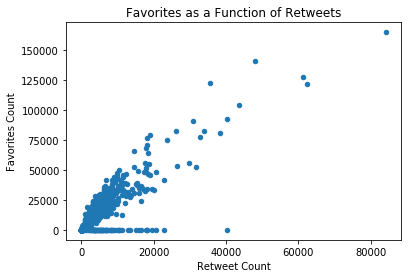

In [64]:
df_new.plot(x='retweet_count',y='favorite_count',kind='scatter')
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')

Text(0.5,1,'Retweet Counts vs. Favorite Counts')

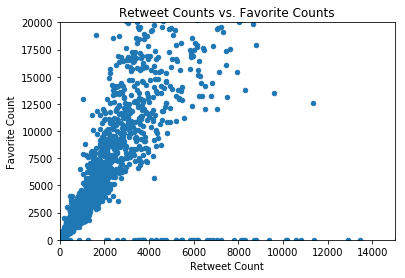

In [65]:
#Replot the above and set lmits on the axes
df_new.plot(x= 'retweet_count',y='favorite_count', kind='scatter', xlim=(0, 15000), ylim=(0, 20000))
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet Counts vs. Favorite Counts')

### Insight Retweet vs. Favorite Counts 
There is a strong positive correlation between retweet counts and favorite counts. 

In [66]:
df_new.groupby(['month_year'])['favorite_count','retweet_count'].mean() # average favorite and retweet counts by month


,favorite_count,retweet_count
month_year,,
2015-12,1382.133903,610.743590
2016-01,3733.648485,1552.072727
2016-02,4169.435185,1517.037037
2016-03,4075.191667,1521.300000
2016-04,3302.903846,1125.288462
2016-05,4425.017544,1570.631579
2016-06,4362.658228,1549.873418
2016-07,5568.838710,1932.322581
2016-08,10962.734375,4557.843750


Text(0.5,1,'Retweets and favorites over time')

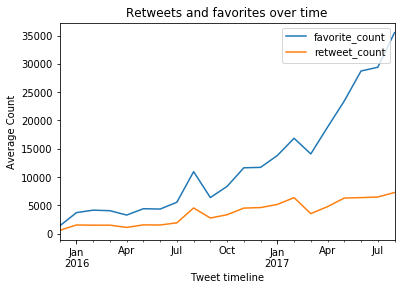

In [67]:
df_new.groupby(['month_year'])['favorite_count','retweet_count'].mean().plot()
plt.legend(loc='upper right')
plt.xlabel('Tweet timeline')
plt.ylabel('Average Count')
plt.title('Retweets and favorites over time')

In [68]:
df_new['month_year'].value_counts().median()

68.0

In [69]:
df_new['month_year'].value_counts().describe()

count     21.000000
mean      83.095238
std       69.536972
min        2.000000
25%       52.000000
50%       68.000000
75%       79.000000
max      351.000000
Name: month_year, dtype: float64

Text(0.5,1,'Number of Tweets by Month')

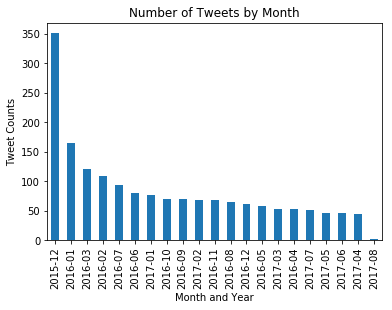

In [70]:
df_new['month_year'].value_counts().plot(kind='bar')
plt.xlabel('Month and Year')
plt.ylabel('Tweet Counts')
plt.title('Number of Tweets by Month')

### Insight Tweet Activity
The average tweet activity per month is about 68 tweet, I choose the median as the center of measurement in our case, because median is less sensitive towards outliers. December 2015 is the month with the highest tweet activity. 

Text(0.5,1,'Distribution of Rating Ratio')

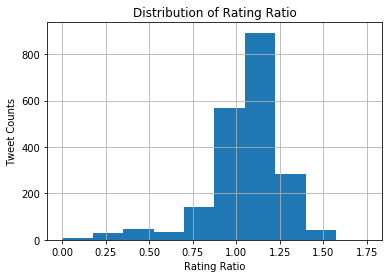

In [71]:
df_new['rating'].hist(range = (0,1.75))
plt.xlabel('Rating Ratio')
plt.ylabel('Tweet Counts')
plt.title('Distribution of Rating Ratio')

In [72]:
df_new['rating'].describe() # mean and standard deviation of rating ratio

count    2044.000000
mean        1.064740
std         0.228191
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         3.428571
Name: rating, dtype: float64

In [73]:
df_new['rating'].value_counts()

1.200000    476
1.000000    419
1.100000    416
1.300000    284
0.900000    150
0.800000     93
0.700000     50
1.400000     40
0.600000     32
0.500000     32
0.300000     19
0.400000     14
0.200000      9
0.100000      4
0.000000      2
2.600000      1
3.428571      1
1.500000      1
2.700000      1
Name: rating, dtype: int64

In [74]:
df_new.groupby(['month_year'])['rating'].mean() # average rating ratio by month

month_year
2015-12    0.907692
2016-01    0.975152
2016-02    1.000000
2016-03    1.035000
2016-04    0.998077
2016-05    1.052632
2016-06    1.029114
2016-07    1.065591
2016-08    1.025000
2016-09    1.090000
2016-10    1.091429
2016-11    1.161765
2016-12    1.186885
2017-01    1.222449
2017-02    1.226471
2017-03    1.241509
2017-04    1.225000
2017-05    1.269565
2017-06    1.263043
2017-07    1.258824
2017-08    1.300000
Freq: M, Name: rating, dtype: float64

Text(0.5,1,'Average Rating by month')

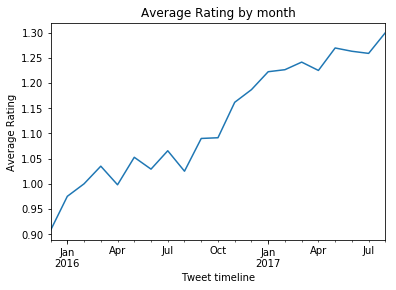

In [75]:
df_new.groupby(['month_year'])['rating'].mean().plot()
plt.xlabel('Tweet timeline')
plt.ylabel('Average Rating')
plt.title('Average Rating by month')

### Insight Rating
The mean of the rating ratio is 1.065, standard deviation is at 0.223, the data points are tend to be close to the mean. However, when we look at the trend of the average rating by month, the rating raio is growing continuously since December 2015. The average rating ratio is in December 2015 at 0.91 and in July 2017 at 1.26. 
